<a href="https://colab.research.google.com/github/Saptasindhu07/Regression-Linear-Ridge-Lasso-ElasticNet-/blob/main/Ridge_Lasso_ElasticNet_Regression_and_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

Add `%load_ext cudf.pandas` before importing pandas to speed up operations using GPU

**Algerian Forest Fires Dataset**

**Data Set Information:**

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2.Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3.RH : Relative Humidity in %: 21 to 90
4.Ws :Wind speed in km/h: 6 to 29
5.Rain: total day in mm: 0 to 16.8 FWI Components
6.Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7.Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8.Drought Code (DC) index from the FWI system: 7 to 220.4
9.Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10.Buildup Index (BUI) index from the FWI system: 1.1 to 68
11.Fire Weather Index (FWI) Index: 0 to 31.1
12.Classes: two classes, namely Fire and not Fire


Add `%load_ext cudf.pandas` before importing pandas to speed up operations using GPU

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Algerian_forest_fires_dataset_UPDATE.csv to Algerian_forest_fires_dataset_UPDATE (3).csv


**DATA CLEANING**

> Add blockquote



In [ ]:
data=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [ ]:
data.drop([122,123], axis=0,inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [ ]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [ ]:
def StripAllSpaces(x):
  return str(x).replace(' ', '')


data=data.map(StripAllSpaces)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,notfire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,notfire


In [ ]:
data_numeric=data.iloc[:,0:13]
data_numeric
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
dtypes: object(13)
memory usage: 34.8+ KB


In [ ]:
for col in data_numeric.columns:
  data_numeric[col]=pd.to_numeric(data_numeric[col],errors='coerce')

<ipython-input-131-cb5d5f32d5ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric[col]=pd.to_numeric(data_numeric[col],errors='coerce')


In [ ]:
data_numeric.iloc[:,0:13].max()

,0
day,31.0
month,9.0
year,2012.0
Temperature,42.0
RH,90.0
Ws,29.0
Rain,16.8
FFMC,96.0
DMC,65.9
DC,220.4


In [ ]:
data_numeric.iloc[:,0:13].min()

,0
day,1.0
month,6.0
year,2012.0
Temperature,22.0
RH,21.0
Ws,6.0
Rain,0.0
FFMC,28.6
DMC,0.7
DC,6.9


In [ ]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 34.8 KB


In [ ]:
data_numeric.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [ ]:
data_numeric[data_numeric['FWI'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,NaN


In [ ]:
data_numeric.drop([167],axis=0,inplace=True)

<ipython-input-137-dd6aa75b667d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric.drop([167],axis=0,inplace=True)


In [ ]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 26.6 KB


In [ ]:
data_numeric.reset_index(drop=True,inplace=True)

In [ ]:
data_numeric.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [ ]:
data_numeric.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

In [ ]:
data_numeric.to_csv('Algerian_forest_fires_cleaned.csv')

**Exploratory Data Analysis**

In [ ]:
df_copy=data_numeric.copy()
df_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [ ]:
df_copy.drop(['day','month','year'],axis=1,inplace=True)

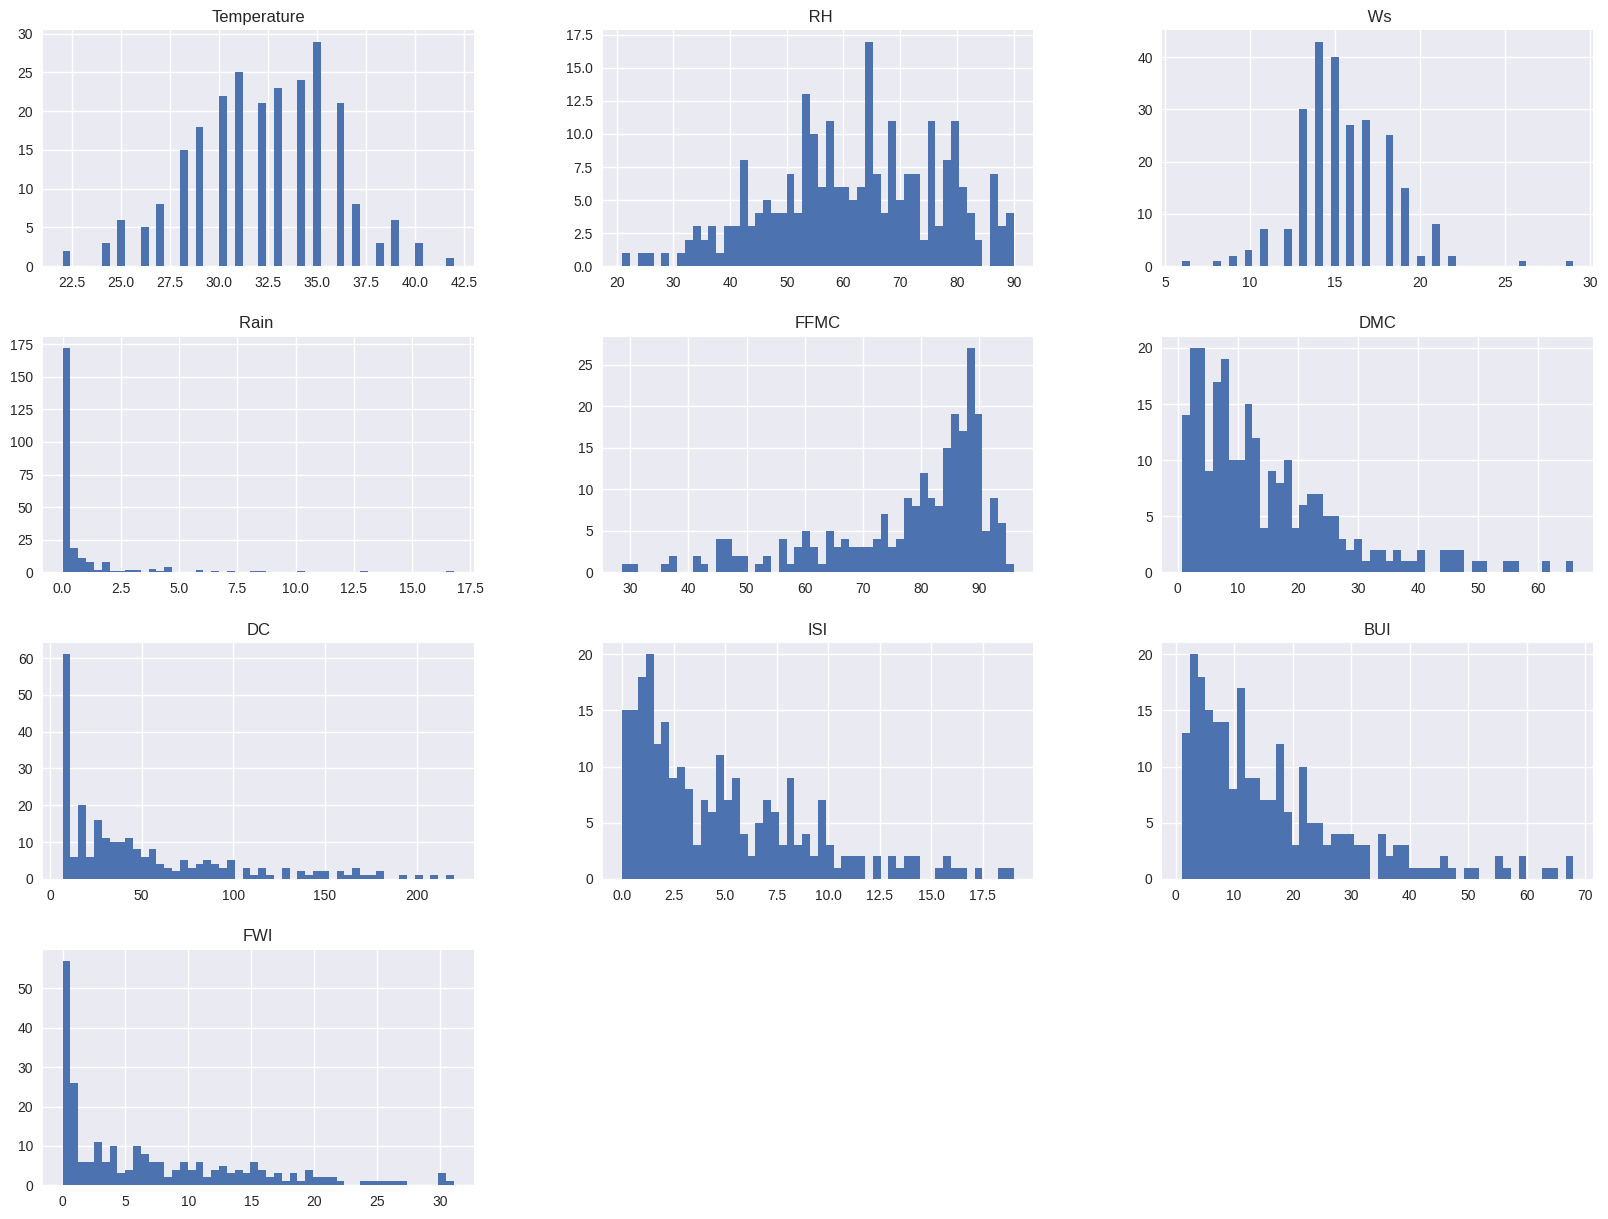

In [ ]:
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


<Axes: ylabel='FWI'>

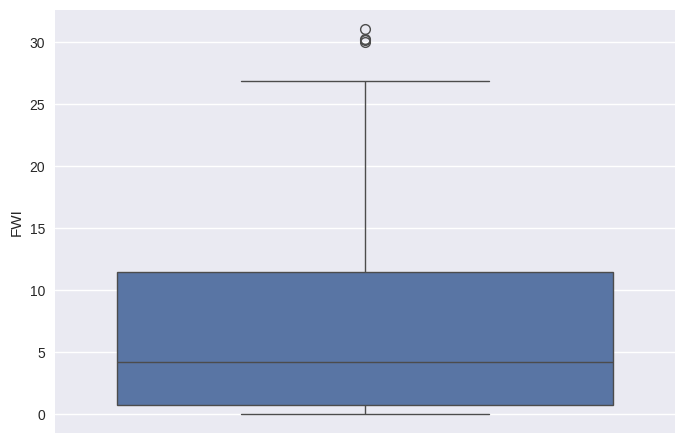

In [ ]:
sns.boxplot(df_copy['FWI'])

**Starting off with Feature Selection**

In [ ]:
X=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Removing highly corelated columns: Threshold value=0.85. We can do it just by observation at the corr table or we can write a simple loop


In [ ]:
X.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000


In [ ]:
def correlation(dataset,threshold):
  result = set()
  corr_matrix=dataset.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range (i):
      if(abs((corr_matrix.iloc[i,j]>threshold))):
        colname=corr_matrix.columns[i]
        result.add(colname)
  return result


In [ ]:
correlation(X,0.85)

{'BUI', 'DC'}

In [ ]:
X_train.drop(['BUI','DC'], axis=1, inplace=True)
X_test.drop(['BUI','DC'], axis=1, inplace=True)

In [ ]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9


In [ ]:
X_train.shape

(194, 7)

In [ ]:
X_test.shape


(49, 7)

In [ ]:
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

<Axes: title={'center': 'Scaled_test'}>

<Figure size 3000x2000 with 0 Axes>

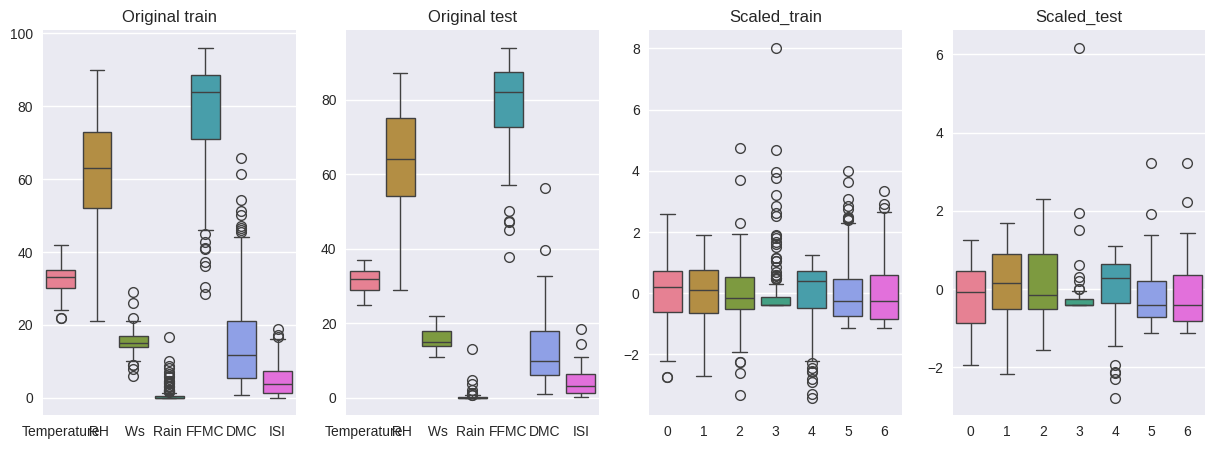

In [ ]:
plt.figure(figsize=(30,20))
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(15, 5))
ax1.title.set_text('Original train')
ax2.title.set_text('Original test')
ax3.title.set_text('Scaled_train')
ax4.title.set_text('Scaled_test')
sns.boxplot(X_train,ax=ax1)
sns.boxplot(X_test,ax=ax2)
sns.boxplot(X_train_scaled,ax=ax3)
sns.boxplot(X_test_scaled,ax=ax4)

# **MODEL SELECTION**
We start off with Linear Regression and then try and use Ridge and Lasso Regression for overcoming Overfitting and further feature selection

In [ ]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [ ]:
print(mae)
print(rmse)
print(r2)

0.6525651398424952
0.9453028435716128
0.9811219421896168


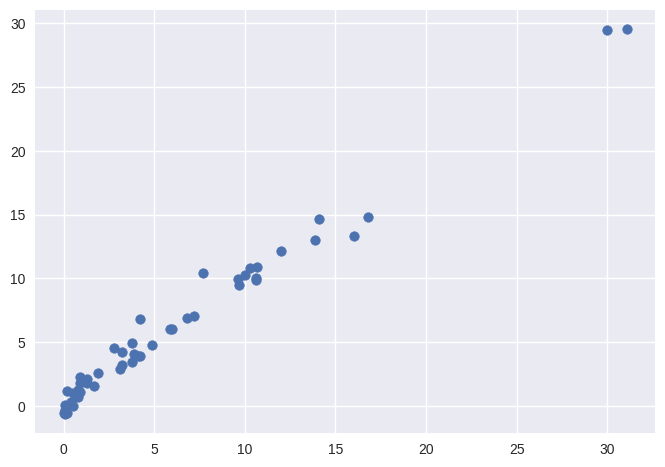

In [ ]:
plt.scatter(y_test,y_pred)

**Going Forward with the Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [ ]:
print(r2)

0.9758797406157629


**Ridge Regression**

```
# This is formatted as code
```

**

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
r2

0.9810579030545429

**Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=0.1)
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
r2


0.9711573158356207

# **HYPERPARAMETER TUNING / CROSS VALIDATION**

**Cross Validation Lasso**

In [ ]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)
y_pred

array([ 1.47140889e+01,  1.00134856e+01,  4.49739898e+00,  3.29768159e+00,
        3.55828364e+00,  1.01498917e+00, -9.10071546e-01,  1.74224200e+00,
        4.06715599e+00,  5.05178183e+00, -6.13896887e-01,  1.08125503e+01,
        4.86571991e+00, -3.07957985e-01,  6.89232924e+00,  1.20779147e+00,
        1.29854358e+01,  8.71907650e-02,  6.82229984e+00,  2.93091112e+01,
        1.46000202e+01, -1.39307146e-01,  9.99202200e+00,  1.33491220e+01,
        4.19262495e+00,  1.78378867e+00,  2.00523123e+00,  6.17968567e+00,
        1.04166943e+01,  1.40050177e+00,  7.96571511e-01,  9.52232698e+00,
       -1.03593346e-02,  4.13763346e+00,  2.13243739e+00,  3.06004456e+00,
       -8.11106177e-01,  6.15187471e+00,  2.40439768e+00,  4.01237369e+00,
        1.21632774e+01,  7.17493036e+00,  1.03696660e+01,  2.92184717e+01,
        1.08454881e+01,  8.96652901e-01,  9.86660381e+00,  3.61605284e-01,
        2.69362351e+00])

In [ ]:
lassocv.alpha_ #best alpha chosen that gives us the best accuracy out of 100 alphas tested

np.float64(0.03437650637598417)

In [ ]:
lassocv.alphas_ # List of all the 100 alphas used for testing

array([6.90704111, 6.44152966, 6.00739212, 5.602514  , 5.2249233 ,
       4.87278096, 4.54437183, 4.23809638, 3.95246287, 3.6860801 ,
       3.43765064, 3.20596449, 2.98989321, 2.78838442, 2.60045664,
       2.42519457, 2.26174457, 2.10931056, 1.96715008, 1.83457075,
       1.71092682, 1.59561608, 1.4880769 , 1.3877855 , 1.2942534 ,
       1.20702505, 1.1256756 , 1.04980883, 0.97905523, 0.91307019,
       0.85153231, 0.79414188, 0.74061938, 0.69070411, 0.64415297,
       0.60073921, 0.5602514 , 0.52249233, 0.4872781 , 0.45443718,
       0.42380964, 0.39524629, 0.36860801, 0.34376506, 0.32059645,
       0.29898932, 0.27883844, 0.26004566, 0.24251946, 0.22617446,
       0.21093106, 0.19671501, 0.18345708, 0.17109268, 0.15956161,
       0.14880769, 0.13877855, 0.12942534, 0.12070251, 0.11256756,
       0.10498088, 0.09790552, 0.09130702, 0.08515323, 0.07941419,
       0.07406194, 0.06907041, 0.0644153 , 0.06007392, 0.05602514,
       0.05224923, 0.04872781, 0.04544372, 0.04238096, 0.03952

In [ ]:
# Lets compare the coefficients predicted by the simple linear regression and this lassoCV regression.

lassocv.coef_

array([-0.        ,  0.08471861,  0.09021572, -0.        , -0.38752166,
        3.6213449 ,  4.79120534])

In [ ]:
lr.coef_

array([ 0.01245334,  0.15287796,  0.09235468, -0.03821063, -0.54324664,
        3.66275698,  4.93778684])

In [ ]:
r2_score(y_test,y_pred)

0.9798099241215289

**Ridge Cross Validation**

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.9730106166621673

In [ ]:
## Lets again compare the intercepts

print(lassocv.coef_)
print(lr.coef_)
print(ridgecv.coef_)



[-0.          0.08471861  0.09021572 -0.         -0.38752166  3.6213449
  4.79120534]
[ 0.01245334  0.15287796  0.09235468 -0.03821063 -0.54324664  3.66275698
  4.93778684]
[ 0.08340347 -0.04204994  0.20604093 -0.0202262  -0.16409147  3.5407967
  4.34436448]


**Going over with Elastic Net CV**

In [ ]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(l1_ratio=0.4,cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.9787543190170995